# MaFaulDa
https://www02.smt.ufrj.br/~offshore/mfs/page_01.html

In [1]:
from zipfile import ZipFile
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

import sys
sys.path.append('../../')
from feature import mafaulda as src

MAFAULDA_PATH = '../../../datasets/MAFAULDA.zip'

View some file names in machinery database and display their count.

In [2]:
files = src.get_mafaulda_files(ZipFile(MAFAULDA_PATH))
print(f'Measurements: {len(files)}')
pprint(files[:10])

Measurements: 1951
['horizontal-misalignment/0.5mm/12.288.csv',
 'horizontal-misalignment/0.5mm/13.5168.csv',
 'horizontal-misalignment/0.5mm/14.5408.csv',
 'horizontal-misalignment/0.5mm/15.36.csv',
 'horizontal-misalignment/0.5mm/16.384.csv',
 'horizontal-misalignment/0.5mm/17.408.csv',
 'horizontal-misalignment/0.5mm/18.8416.csv',
 'horizontal-misalignment/0.5mm/19.6608.csv',
 'horizontal-misalignment/0.5mm/20.48.csv',
 'horizontal-misalignment/0.5mm/21.504.csv']


Show details of one measurments

In [3]:
misalign = src.csv_import(ZipFile(MAFAULDA_PATH), 'horizontal-misalignment/1.5mm/16.7936.csv')
misalign.describe()
misalign

,index,tachometer,ax,ay,az,bx,by,bz,mic,mag_a,mag_b,rpm,key
t,,,,,,,,,,,,,
0.00000,0,-0.58784,-0.866180,0.977448,-0.045645,-0.38288,0.383733,-0.21749,0.21164,0.977448,0.383733,979.400349,horizontal-misalignment/1.5mm/16.7936.csv
0.00002,1,-0.60290,0.793950,0.851115,0.028109,-0.30024,0.300946,-0.13788,-0.15863,0.851115,0.300946,979.400349,horizontal-misalignment/1.5mm/16.7936.csv
0.00004,2,-0.56863,-0.296000,0.463551,-0.020134,-0.34636,0.346951,-0.18297,0.18606,0.463551,0.346951,979.400349,horizontal-misalignment/1.5mm/16.7936.csv
0.00006,3,-0.54920,0.046056,0.121599,0.022424,-0.31363,0.314245,-0.18443,-0.10689,0.121599,0.314245,979.400349,horizontal-misalignment/1.5mm/16.7936.csv
0.00008,4,-0.57066,0.412470,0.437597,0.028122,-0.30435,0.305171,-0.20294,0.13121,0.437597,0.305171,979.400349,horizontal-misalignment/1.5mm/16.7936.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.99990,249995,-0.87862,-1.986800,2.053727,-0.083187,-1.56850,1.569004,-0.45908,0.36166,2.053727,1.569004,979.400349,horizontal-misalignment/1.5mm/16.7936.csv
4.99992,249996,-0.79904,0.859360,0.892822,0.043119,-1.44190,1.442412,-0.36883,-0.23196,0.892822,1.442412,979.400349,horizontal-misalignment/1.5mm/16.7936.csv
4.99994,249997,-0.72662,-1.441000,1.524046,-0.038522,-1.51410,1.514641,-0.42973,0.44066,1.524046,1.514641,979.400349,horizontal-misalignment/1.5mm/16.7936.csv


Plot tachometer pulses and calculate revolutions per minute (rpm)

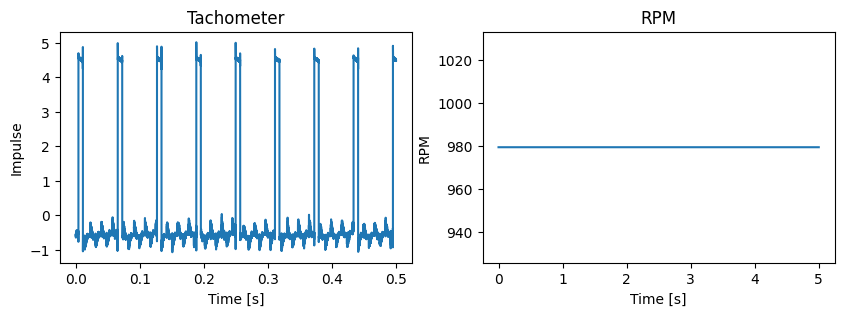

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
g = misalign['tachometer'][:0.5].plot(ax=ax[0], title='Tachometer', xlabel='Time [s]', ylabel='Impulse')
g = misalign['rpm'].plot(ax=ax[1], title='RPM', xlabel='Time [s]', ylabel='RPM')

Plot histograms for each column to get sense of the distributions

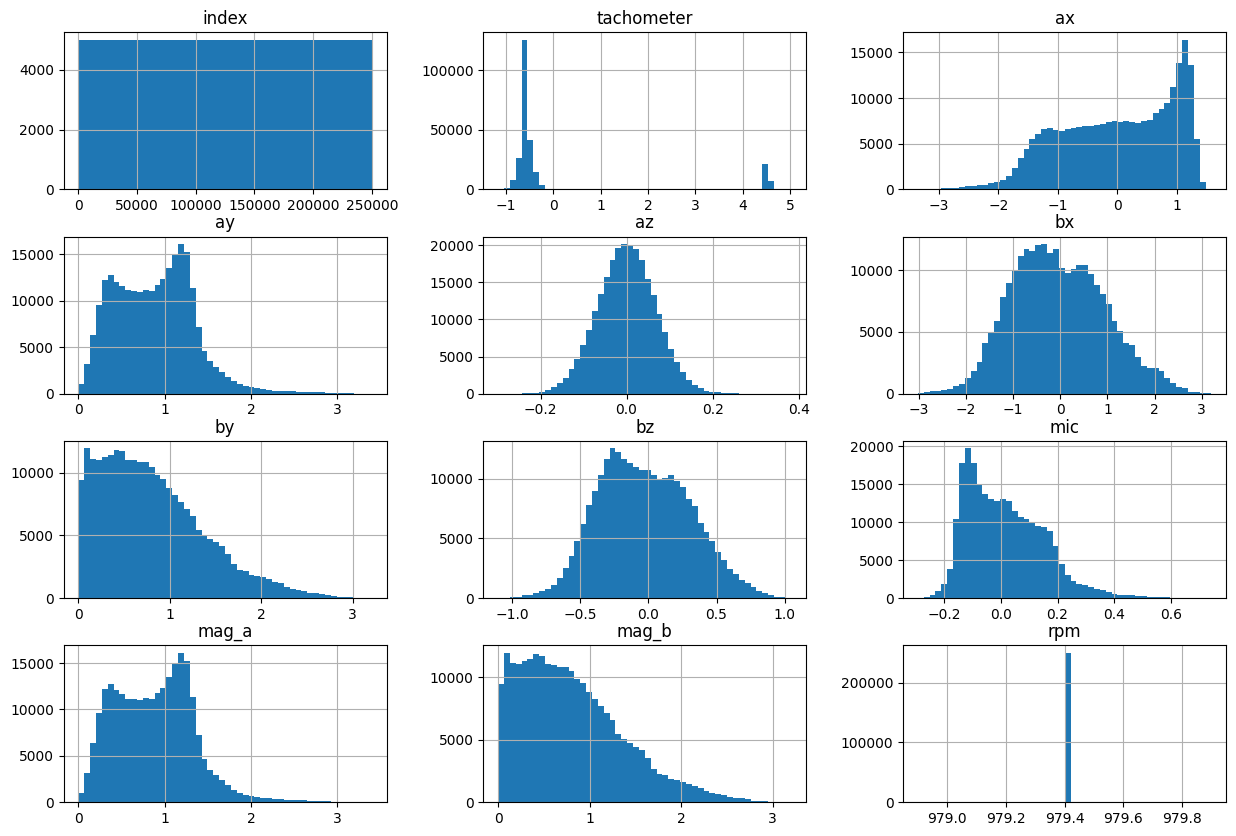

In [5]:
g = misalign.hist(figsize=(15, 10), bins=50)

Plot short segment of time domain signal

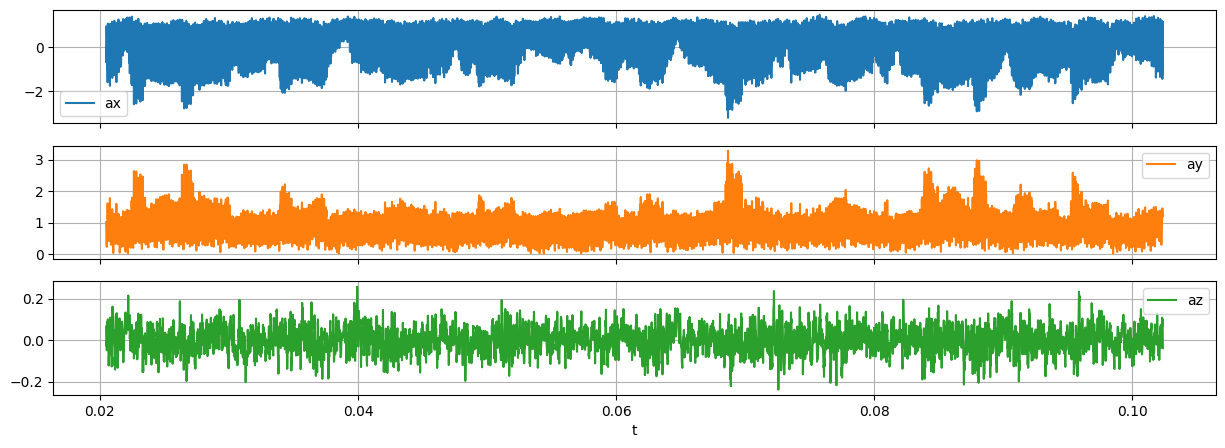

In [6]:
x = 1024
l = 4096
g = misalign[['ax', 'ay', 'az']].iloc[x:x+l].plot(subplots=True, figsize=(15, 5), grid=True)

Plot subsampled time domain signal with subsampling factor

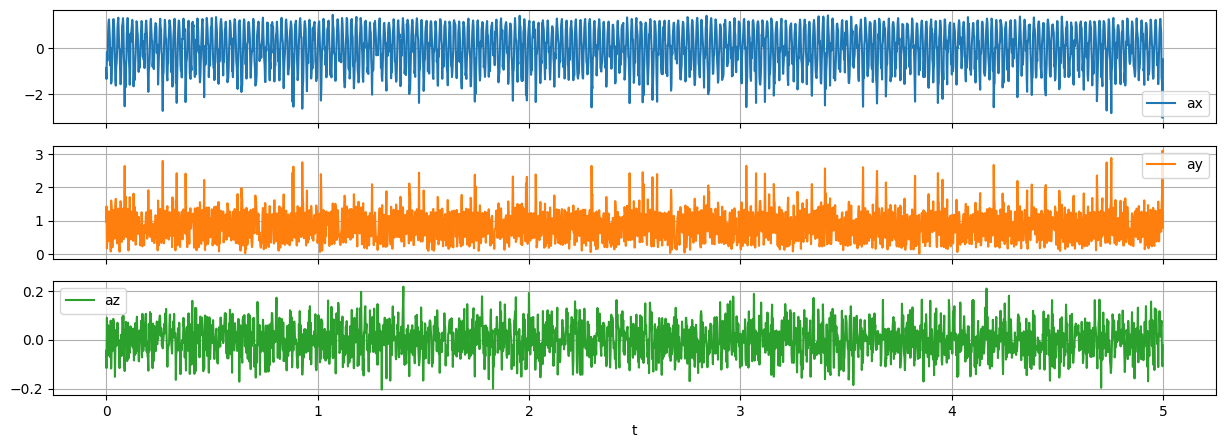

In [7]:
factor = 100
g = misalign[['ax', 'ay', 'az']].iloc[::factor, :].plot(subplots=True, figsize=(15, 5), grid=True)

Plot magnitutes of each acceleration vector

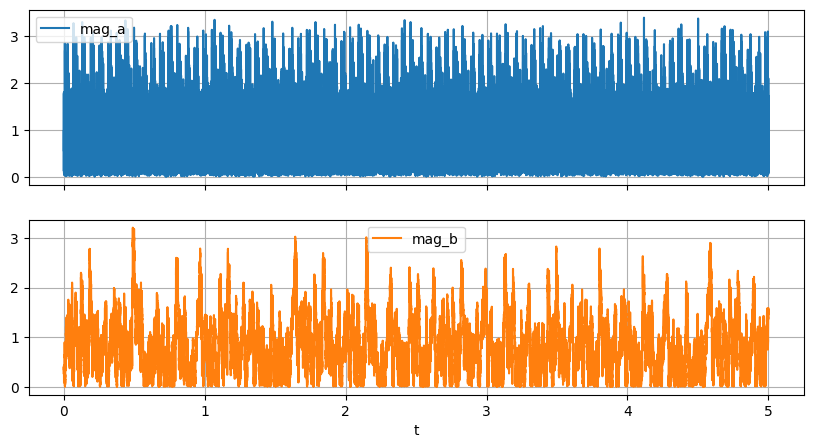

In [8]:
g = misalign[['mag_a', 'mag_b']].plot(subplots=True, figsize=(10, 5), grid=True)

Normality test p-value:  0.0 (<0.05 is not normal)
Normality test p-value:  0.0 (<0.05 is not normal)
Normality test p-value:  0.0 (<0.05 is not normal)
Normality test p-value:  0.0 (<0.05 is not normal)
Normality test p-value:  0.0 (<0.05 is not normal)
Normality test p-value:  0.0 (<0.05 is not normal)


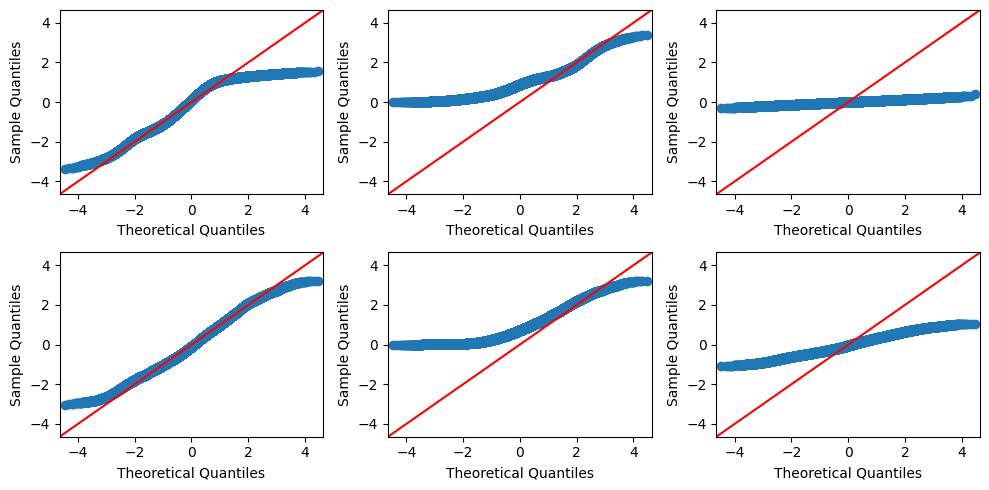

In [9]:
src.normality_tests(misalign)

Window size: 6250
Heinsenberg box
	Time step: 125.0 ms
	Frequency step: 8.0 Hz


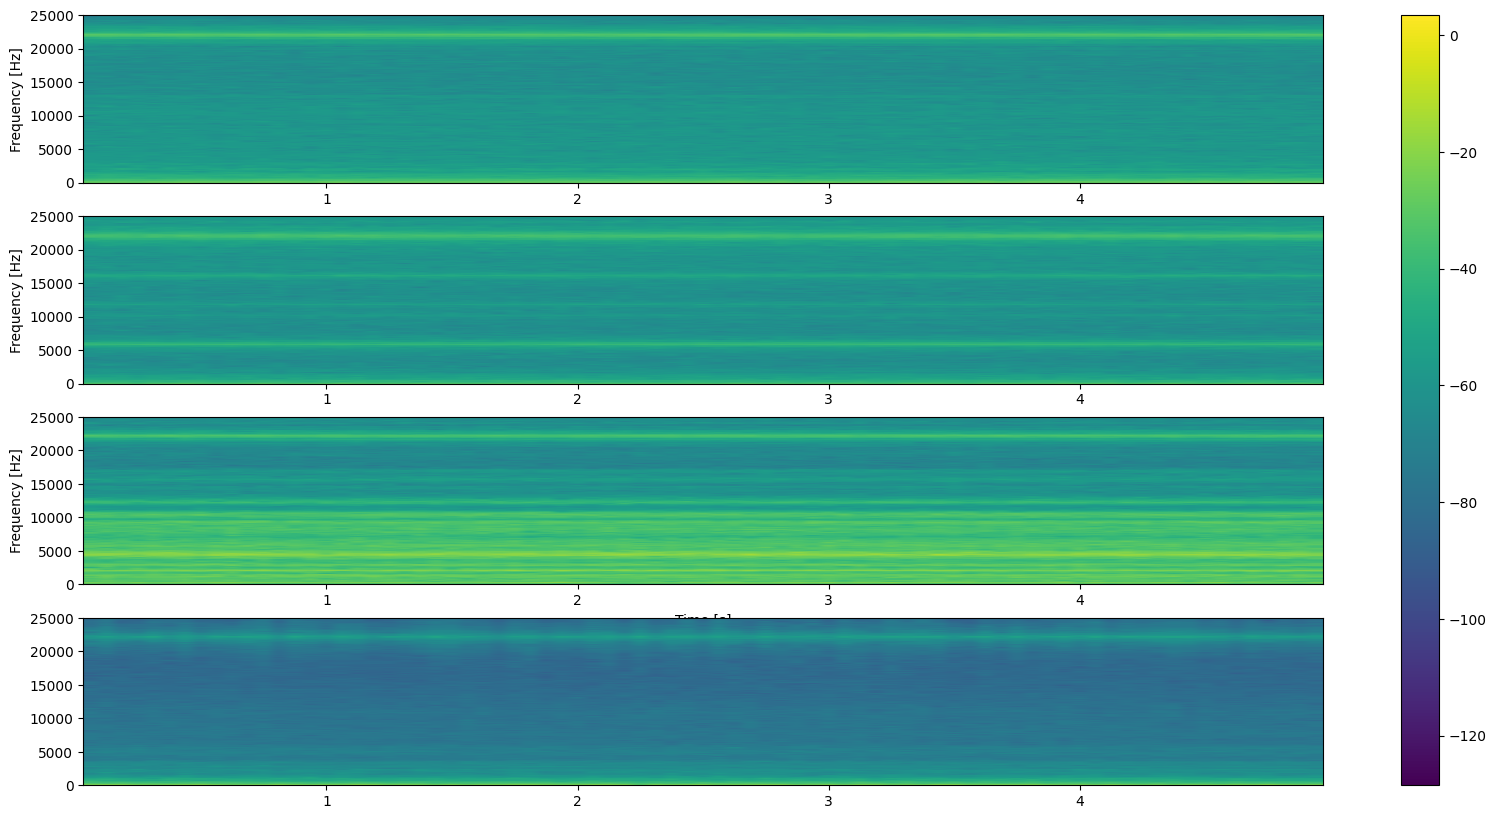

In [10]:
src.axis_spectrograms(misalign)

Do not use magnitude - it is not oscilatory. Various axis have different responses, but the signal in each axis is **stationary**

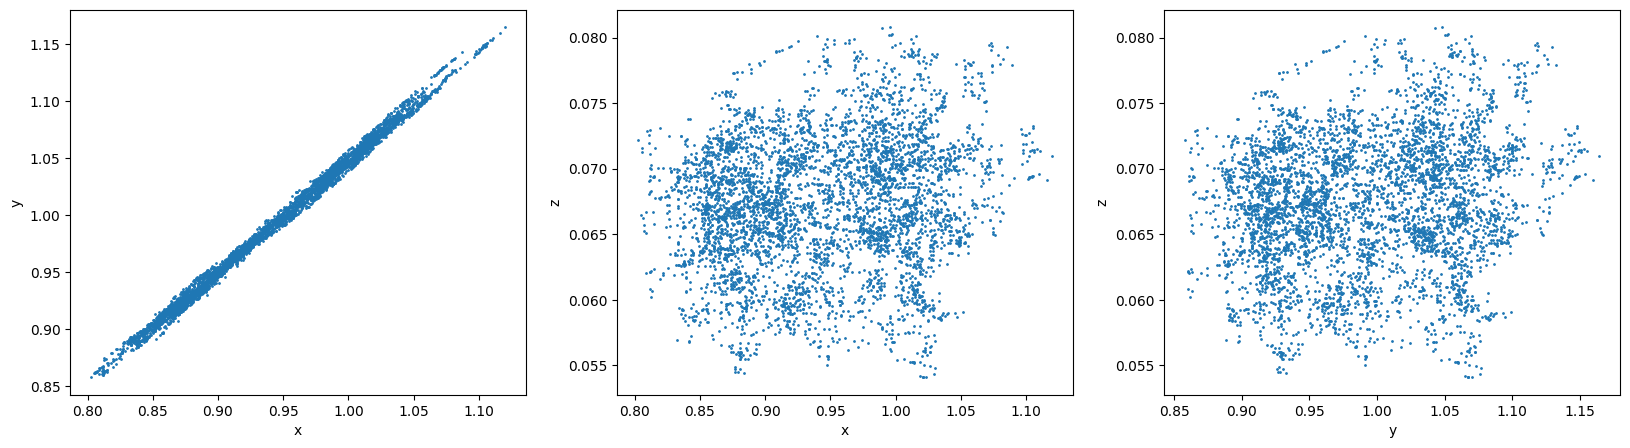

In [11]:
subsample = 50
src.rms_orbitals(misalign.iloc[::subsample, :])

Load normal conditions

In [12]:
zip_file = ZipFile(MAFAULDA_PATH)
filenames = src.get_mafaulda_files(zip_file)
normal_files = [
    name for name in filenames if name.startswith('normal')
]
normal_cond = src.import_files(zip_file, normal_files, src.csv_import)
normal_cond.head()

  0%|          | 0/49 [00:00<?, ?it/s]

,index,tachometer,ax,ay,az,bx,by,bz,mic,mag_a,mag_b,rpm,key
t,,,,,,,,,,,,,
0.00000,0,4.5595,0.175200,0.336429,-0.017751,-0.41565,0.416915,-0.11218,-0.128140,0.336429,0.416915,725.169104,normal/12.288.csv
0.00002,1,4.6038,-0.051295,0.200715,-0.060071,-0.41809,0.419684,-0.11043,0.118310,0.200715,0.419684,725.169104,normal/12.288.csv
0.00004,2,4.5703,-0.969080,0.969826,-0.028329,-0.43081,0.432845,-0.14331,-0.071527,0.969826,0.432845,725.169104,normal/12.288.csv
0.00006,3,4.5870,0.891270,0.894252,0.007453,-0.40017,0.402274,-0.11984,0.043445,0.894252,0.402274,725.169104,normal/12.288.csv
0.00008,4,4.5887,-1.716000,1.747309,-0.033063,-0.50281,0.504436,-0.25270,0.023901,1.747309,0.504436,725.169104,normal/12.288.csv


Calculate time domain features on normal conditions in one accelerometer axis

In [13]:
td_featues = src.time_domain_features(normal_cond, 'ax')
td_featues.head(10)

,mean,std,skew,kurtosis,rms
key,,,,,
normal/12.288.csv,-0.002661,0.979176,-0.296534,-1.065732,0.979178
normal/13.1072.csv,0.016244,1.245483,-0.360693,-0.984753,1.245586
normal/14.336.csv,0.046744,1.326419,-0.352697,-1.021571,1.327239
normal/15.1552.csv,0.027897,1.291672,-0.352714,-0.998585,1.291971
normal/16.1792.csv,-0.005373,1.136200,-0.337205,-1.000170,1.136210
normal/17.2032.csv,0.003029,1.055431,-0.325468,-1.026738,1.055433
normal/18.432.csv,0.026956,1.103105,-0.414823,-0.854676,1.103432
normal/19.6608.csv,0.004006,1.050094,-0.407902,-0.813242,1.050100
normal/20.2752.csv,-0.000910,1.038166,-0.418646,-0.790752,1.038164


In [14]:
#sns.pairplot(td_featues)

<Axes: >

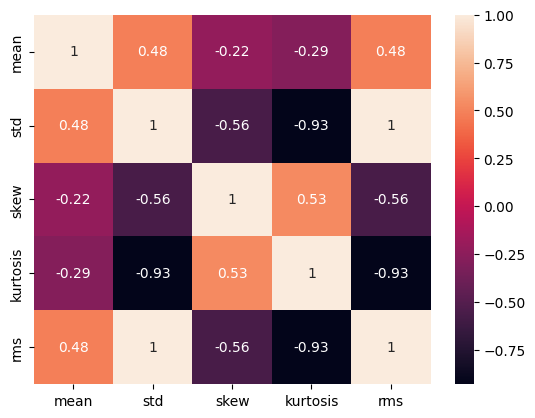

In [15]:
sns.heatmap(td_featues.corr(), annot=True)

In [16]:
imbalance = src.csv_import_td_features(zip_file, 'imbalance/10g/56.9344.csv')
#imbalance.to_csv('imbalance_features.csv')
imbalance.reset_index(inplace=True)

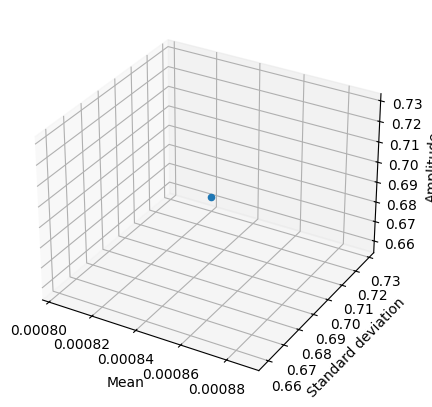

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(imbalance['mean'], imbalance['std'], imbalance['rms'])

ax.set_xlabel('Mean')
ax.set_ylabel('Standard deviation')
ax.set_zlabel('Amplitude')

plt.show()

In [18]:
from multiprocessing.pool import ThreadPool

pool = ThreadPool(processes=4)
imbalance_files = [
    name for name in filenames if name.startswith('imbalance')
]
WINDOW = 2**14
src.resolution_calc(src.FS_HZ, WINDOW)
spectra = src.fft_csv_import(zip_file, 'imbalance/10g/56.9344.csv', fs=src.FS_HZ, window=WINDOW, overlap=0.5, is_welch=True)
spectra.head(10)

Window size: 16384
Heinsenberg box
	Time step: 327.68 ms
	Frequency step: 3.0517578125 Hz


,,0,3,6,9,12,15,18,21,24,27,...,24972,24975,24978,24981,24984,24987,24990,24993,24996,24999
load,no,,,,,,,,,,,,,,,,,,,,,
10,56.9344.csv,0.000026,0.000062,0.000049,0.000021,0.000019,0.000015,0.000015,0.000019,0.000019,0.000021,...,3.372855e-07,6.082168e-07,6.923060e-07,5.730615e-07,4.607384e-07,5.058310e-07,5.100141e-07,4.979432e-07,5.250589e-07,2.232962e-07


<Axes: >

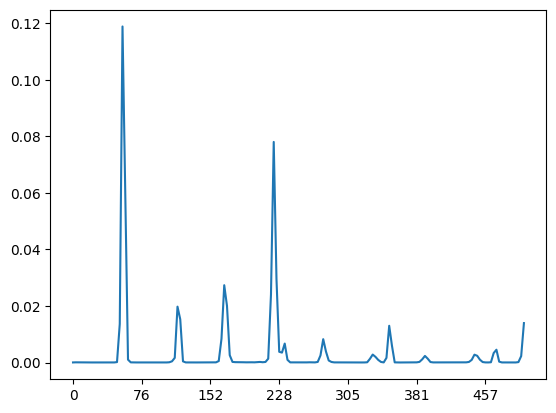

In [19]:
spectra.iloc[0].loc[:500].plot(legend=False)

<Axes: >

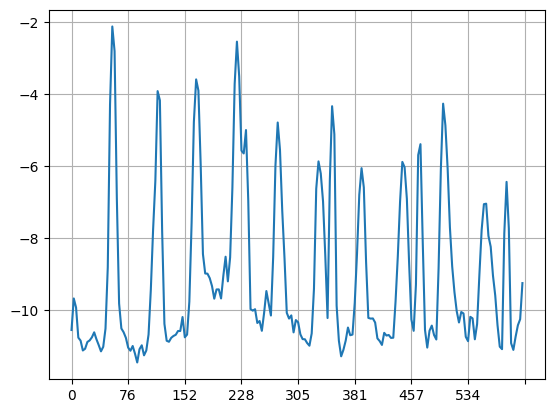

In [20]:
np.log(spectra.iloc[0]).iloc[:200].plot(legend=False, grid=True)

In [21]:
WINDOW = 2**13
from tqdm.notebook import tqdm

zip_file = ZipFile(MAFAULDA_PATH)
imbalancePSD = pd.concat([
    pool.apply_async(src.fft_csv_import, (zip_file, name, WINDOW, 0.5, src.FS_HZ, True)).get()
    for name in tqdm(imbalance_files)
])

  0%|          | 0/333 [00:00<?, ?it/s]

In [22]:
imbalancePSD

0         6         12        18        24        30     \
load no                                                                        
10   13.9264.csv  0.001765  0.008179  0.021998  0.009983  0.000150  0.000239   
     14.5408.csv  0.000475  0.001010  0.017793  0.011542  0.000261  0.000082   
     15.7696.csv  0.000383  0.000223  0.010498  0.011544  0.000601  0.000046   
     16.5888.csv  0.000443  0.000802  0.007983  0.011685  0.000857  0.000055   
     17.2032.csv  0.000908  0.003006  0.008319  0.015515  0.001817  0.000070   
...                    ...       ...       ...       ...       ...       ...   
6    58.1632.csv  0.000053  0.000061  0.000036  0.000027  0.000025  0.000026   
     58.7776.csv  0.000083  0.000103  0.000049  0.000029  0.000027  0.000029   
     59.392.csv   0.000097  0.000096  0.000040  0.000026  0.000023  0.000024   
     60.2112.csv  0.000094  0.000145  0.000058  0.000033  0.000027  0.000025   
     62.0544.csv  0.000025  0.000049  0.000033  0.000035  0.000030  0.000030   

                     36        42        48        54     ...         24945  \
load no                                                   ...                 
10   13.9264.csv  0.010889  0.017404  0.001689  0.001160  ...  1.374594e-06   
     14.5408.csv  0.005069  0.020857  0.005455  0.001270  ...  1.139157e-06   
     15.7696.csv  0.000240  0.009355  0.011416  0.000487  ...  1.811216e-06   
     16.5888.csv  0.000026  0.003630  0.011867  0.002957  ...  9.967949e-07   
     17.2032.csv  0.000069  0.001417  0.013430  0.007861  ...  1.738633e-06   
...                    ...       ...       ...       ...  ...           ...   
6    58.1632.csv  0.000032  0.000066  0.004239  0.044967  ...  1.020524e-06   
     58.7776.csv  0.000028  0.000078  0.002651  0.044777  ...  1.347211e-06   
     59.392.csv   0.000024  0.000072  0.001692  0.044787  ...  6.859212e-07   
     60.2112.csv  0.000031  0.000048  0.000820  0.042351  ...  8.156507e-07   
     62.0544.csv  0.000034  0.000038  0.000093  0.029601  ...  9.496662e-07   

                         24951         24957         24963         24969  \
load no                                                                    
10   13.9264.csv  1.459520e-06  1.501825e-06  1.569204e-06  1.422714e-06   
     14.5408.csv  1.235745e-06  1.621026e-06  2.560615e-06  2.302950e-06   
     15.7696.csv  1.924146e-06  1.809312e-06  2.116500e-06  1.317532e-06   
     16.5888.csv  9.961586e-07  8.308344e-07  1.208232e-06  1.231487e-06   
     17.2032.csv  1.344106e-06  1.202278e-06  1.483814e-06  1.524053e-06   
...                        ...           ...           ...           ...   
6    58.1632.csv  9.219601e-07  8.938262e-07  9.559939e-07  8.268244e-07   
     58.7776.csv  1.294228e-06  1.247572e-06  1.265189e-06  7.927197e-07   
     59.392.csv   1.396550e-06  2.032245e-06  9.115207e-07  8.076500e-07   
     60.2112.csv  8.277896e-07  9.257179e-07  9.500321e-07  1.041036e-06   
     62.0544.csv  1.253962e-06  1.174693e-06  1.012292e-06  9.269533e-07   

                         24975         24981         24987         24993  \
load no                                                                    
10   13.9264.csv  1.458445e-06  1.607234e-06  1.300447e-06  1.332438e-06   
     14.5408.csv  1.846861e-06  2.016142e-06  1.639964e-06  1.792556e-06   
     15.7696.csv  9.277049e-07  1.271980e-06  1.125802e-06  1.106669e-06   
     16.5888.csv  1.099684e-06  1.057342e-06  8.676512e-07  9.356892e-07   
     17.2032.csv  1.310960e-06  1.202329e-06  1.256441e-06  1.434234e-06   
...                        ...           ...           ...           ...   
6    58.1632.csv  1.298995e-06  1.298660e-06  9.936776e-07  1.002983e-06   
     58.7776.csv  9.857168e-07  1.915319e-06  2.577813e-06  1.036300e-06   
     59.392.csv   8.522333e-07  9.118159e-07  1.008162e-06  6.795088e-07   
     60.2112.csv  1.022600e-06  9.288750e-07  9.624339e-07  7.921137e-07   
     62.0544.csv  8.525096e-07  9.344741e-07  4.235

<Axes: >

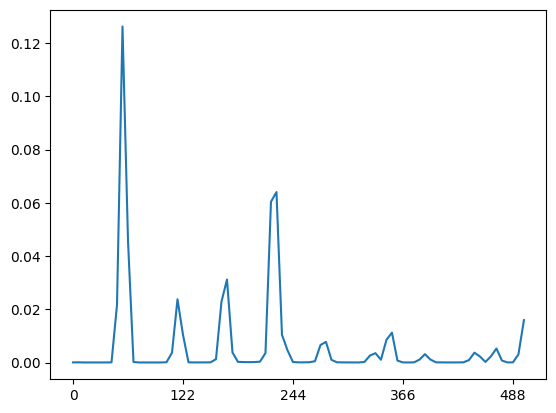

In [23]:
imbalancePSD.T[(10, '56.9344.csv')].loc[:500].plot()

Text(0, 0.5, 'Amplitude')

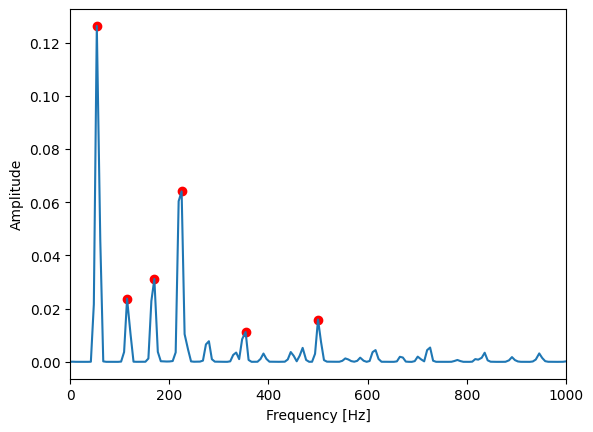

In [24]:
bins = imbalancePSD.T[(10, '56.9344.csv')]
peaks, properties = find_peaks(bins, prominence=0.01)
plt.plot(bins.index, bins)
plt.scatter(bins.index[peaks], bins[bins.index[peaks]], color='r')
plt.xlim(0, 1000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

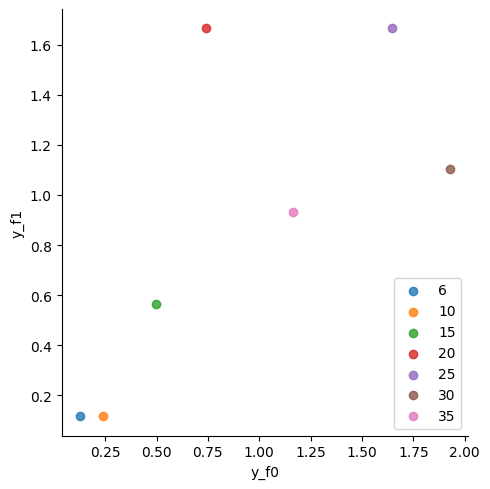

In [25]:
peak_features = src.extract_peaks(imbalancePSD)
sns.lmplot(x='y_f0', y='y_f1', data=peak_features, fit_reg=False, hue='load_f0', legend=False)
plt.legend(loc='lower right')
plt.show()

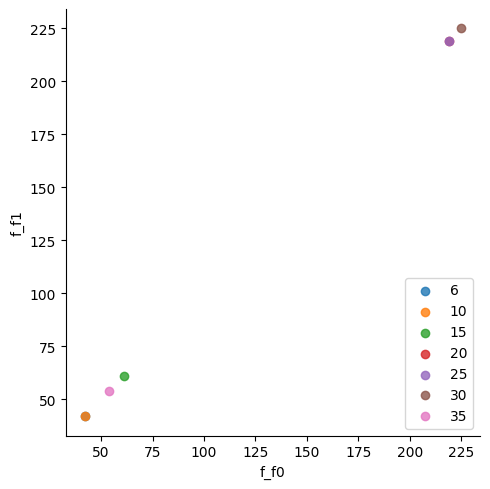

In [26]:
sns.lmplot(x='f_f0', y='f_f1', data=peak_features, fit_reg=False, hue='load_f0', legend=False)
plt.legend(loc='lower right')
plt.show()

In [27]:
# Spectral statistics
from scipy.stats import skew, kurtosis

rms = lambda x: np.sqrt((x ** 2).mean())
spectral_centroid = lambda x: np.average(x.index, weights=x)

fd_features = pd.concat([
    imbalancePSD.mean(axis=1).rename('mean'),
    imbalancePSD.std(axis=1).rename('std'),
    imbalancePSD.T.apply(lambda x: skew(x)).rename('skew'),
    imbalancePSD.T.apply(lambda x: kurtosis(x)).rename('kurtosis'),
    imbalancePSD.T.apply(rms).rename('rms'),
    imbalancePSD.T.apply(spectral_centroid).rename('centroid')
    ],
    axis=1
)
fd_features.head(10)

mean       std       skew     kurtosis       rms  \
load no                                                                  
10   13.9264.csv  0.000561  0.020305  50.273553  2675.620847  0.020310   
     14.5408.csv  0.000534  0.019027  47.639550  2355.995339  0.019032   
     15.7696.csv  0.000388  0.013932  45.048596  2035.264987  0.013936   
     16.5888.csv  0.000330  0.011967  45.452474  2084.368275  0.011970   
     17.2032.csv  0.000373  0.013307  48.054173  2405.839761  0.013311   
     18.2272.csv  0.000497  0.017439  54.246193  3146.422359  0.017444   
     19.2512.csv  0.000447  0.015760  54.997556  3233.597009  0.015764   
     20.48.csv    0.000347  0.012594  54.687919  3194.784379  0.012597   
     21.7088.csv  0.000346  0.012083  54.978901  3232.108009  0.012086   
     22.1184.csv  0.000365  0.012331  50.448803  2700.881109  0.012335   

                      centroid  
load no                         
10   13.9264.csv  19156.608946  
     14.5408.csv  19072.443748  
     15.7696.csv  19390.454575  
     16.5888.csv  19525.911888  
     17.2032.csv  19092.704434  
     18.2272.csv  18417.649689  
     19.2512.csv  18407.077118  
     20.48.csv    18941.455145  
     21.7088.csv  18246.021796  
     22.1184.csv  18018.243722

In [28]:
# sns.pairplot(fd_features)

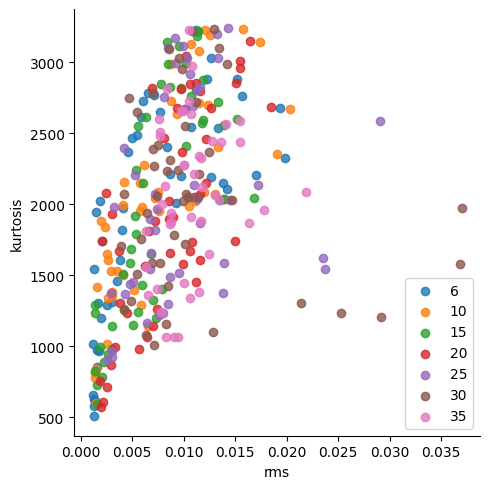

In [30]:
fd_plain = fd_features.reset_index()
sns.lmplot(x='rms', y='kurtosis', data=fd_plain, fit_reg=False, hue='load', legend=False)
plt.legend(loc='lower right')
plt.show()

Text(0.5, 0, 'RMS')

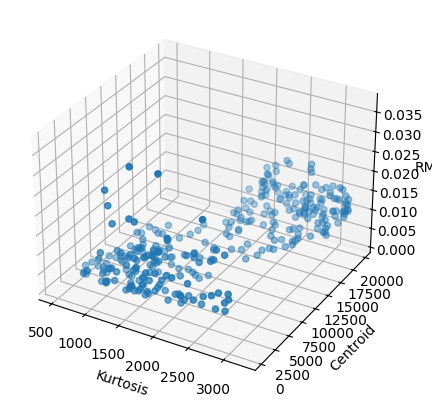

In [31]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(fd_plain['kurtosis'], fd_plain['centroid'], fd_plain['rms'])

ax.set_xlabel('Kurtosis')
ax.set_ylabel('Centroid')
ax.set_zlabel('RMS')

In [ ]:
# Compare different faults

### PSD of severe faults by axis (Welch) - up to 2 kHz (120 000 RPM)

In [32]:
FS = 50000
WINDOW = 2**13
fault_files = [
    'horizontal-misalignment/2.0mm/60.8256.csv',
    'vertical-misalignment/1.90mm/61.44.csv',
    'imbalance/35g/56.7296.csv',
    'normal/61.44.csv',
    'overhang/ball_fault/35g/32.1536.csv',
    'overhang/cage_fault/35g/54.0672.csv',
    'overhang/outer_race/35g/53.4528.csv',
    'underhang/ball_fault/35g/50.7904.csv',
    'underhang/cage_fault/35g/56.5248.csv',
    'underhang/outer_race/35g/58.9824.csv'
]

src.fft_csv_import_by_axis(ZipFile(MAFAULDA_PATH), 'normal/61.44.csv', 'az', WINDOW, 0.5, src.FS_HZ, True)

,0,6,12,18,24,30,36,42,48,54,...,24951,24957,24963,24969,24975,24981,24987,24993,24999,rpm
name,,,,,,,,,,,,,,,,,,,,,
normal/61.44.csv,0.000002,0.000001,2.936326e-07,2.446462e-07,3.653517e-07,2.080615e-07,1.984991e-07,1.799827e-07,0.000003,0.000746,...,5.058870e-07,5.768649e-07,5.049031e-07,5.894736e-07,7.291238e-07,6.523666e-07,5.332315e-07,5.676672e-07,2.220919e-07,3604.05969


### Measurement place A - import worst faults and compare each axis's PSD

In [33]:
zip_file = ZipFile(MAFAULDA_PATH)
faultPSD_X = pd.concat([
    pool.apply_async(src.fft_csv_import_by_axis, (zip_file, name, 'ax', WINDOW, 0.5, src.FS_HZ, True)).get()
    for name in tqdm(fault_files)
])

faultPSD_Y = pd.concat([
    pool.apply_async(src.fft_csv_import_by_axis, (zip_file, name, 'ay', WINDOW, 0.5, src.FS_HZ, True)).get()
    for name in tqdm(fault_files)
])

faultPSD_Z = pd.concat([
    pool.apply_async(src.fft_csv_import_by_axis, (zip_file, name, 'az', WINDOW, 0.5, src.FS_HZ, True)).get()
    for name in tqdm(fault_files)
])

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

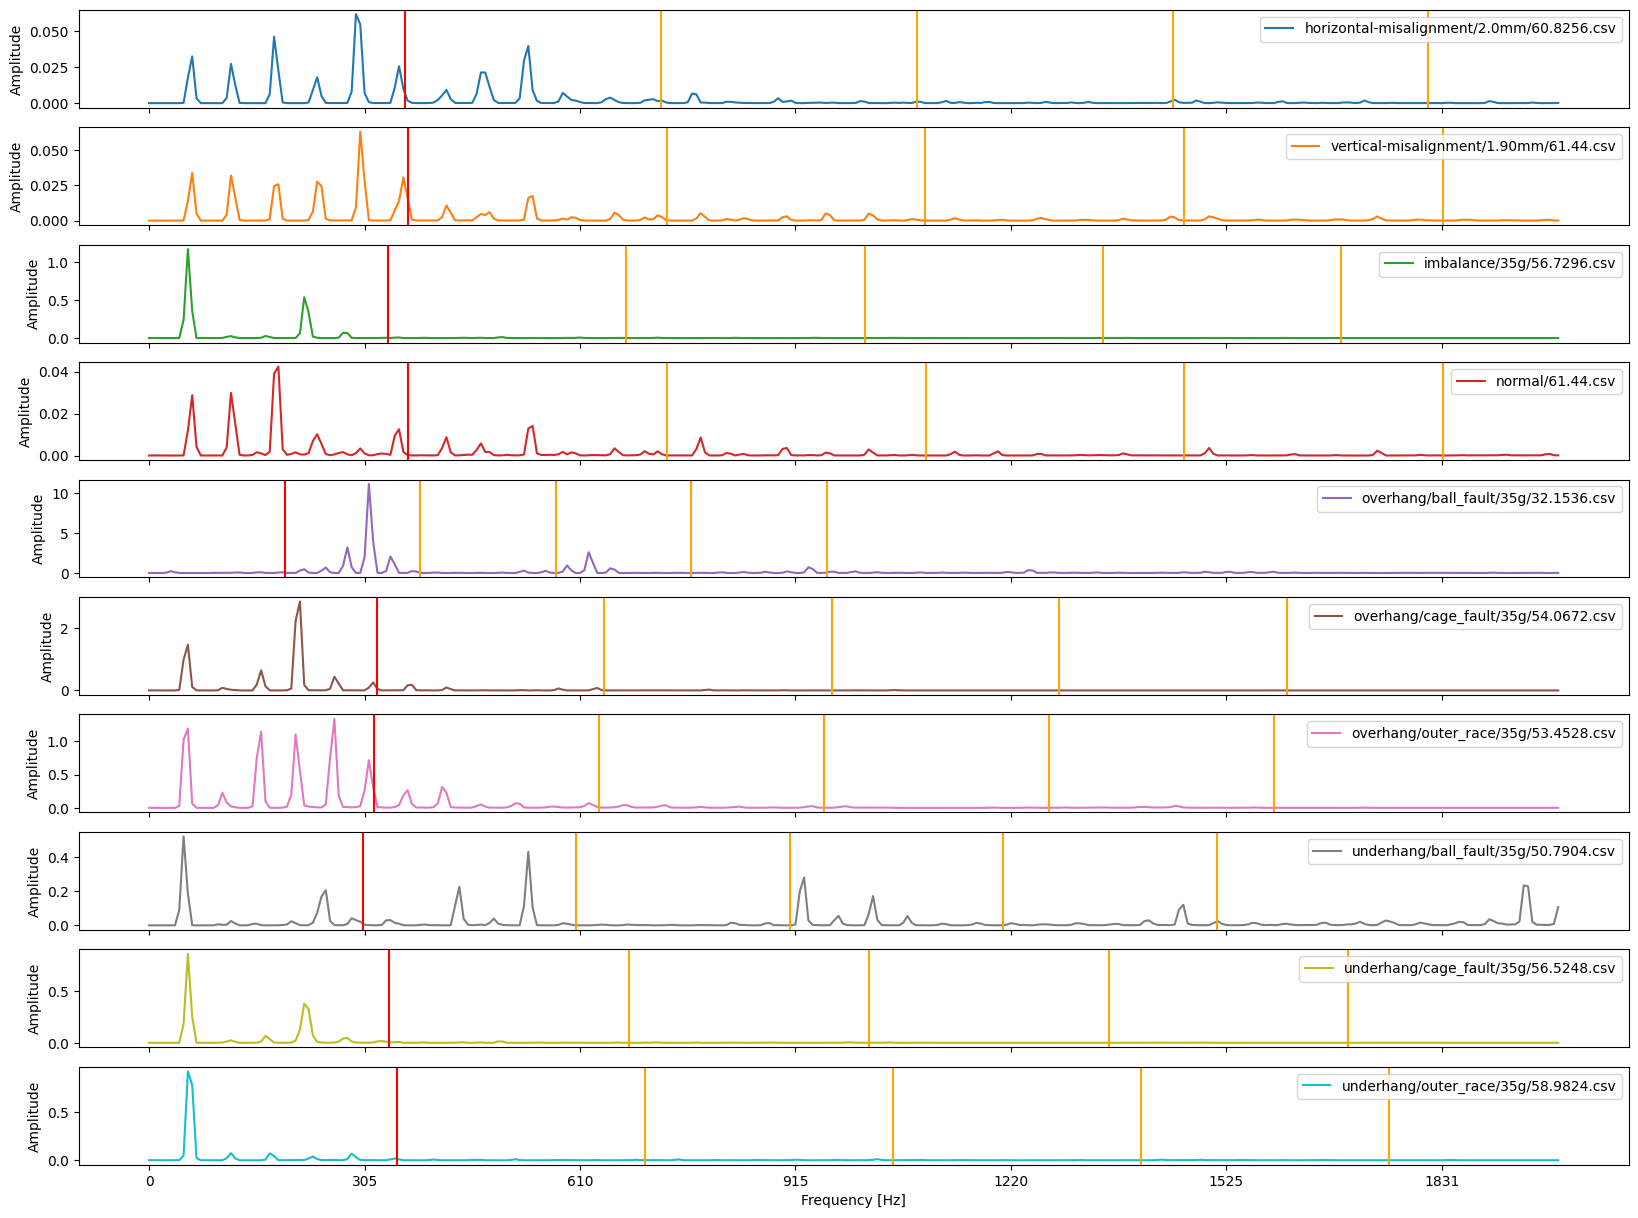

In [34]:
f_cutoff = 2000

faultPSD_X_v = faultPSD_X.drop('rpm', axis=1)
x_psd = (
    faultPSD_X_v
    .T[faultPSD_X_v.T.index < f_cutoff]
)
axis = x_psd.plot(
    subplots=True,
    figsize=(20, 15),
    xlabel='Frequency [Hz]',
    ylabel='Amplitude'
)

# Graph RPM
for ax, rpm  in zip(axis, faultPSD_X['rpm']):
    f0 = rpm / 60
    ax.axvline(x=f0, color='red')
    # n - harmonics of rotating frequency
    n = 6
    for i in range(2, n):
        ax.axvline(x=f0 * i, color='orange')

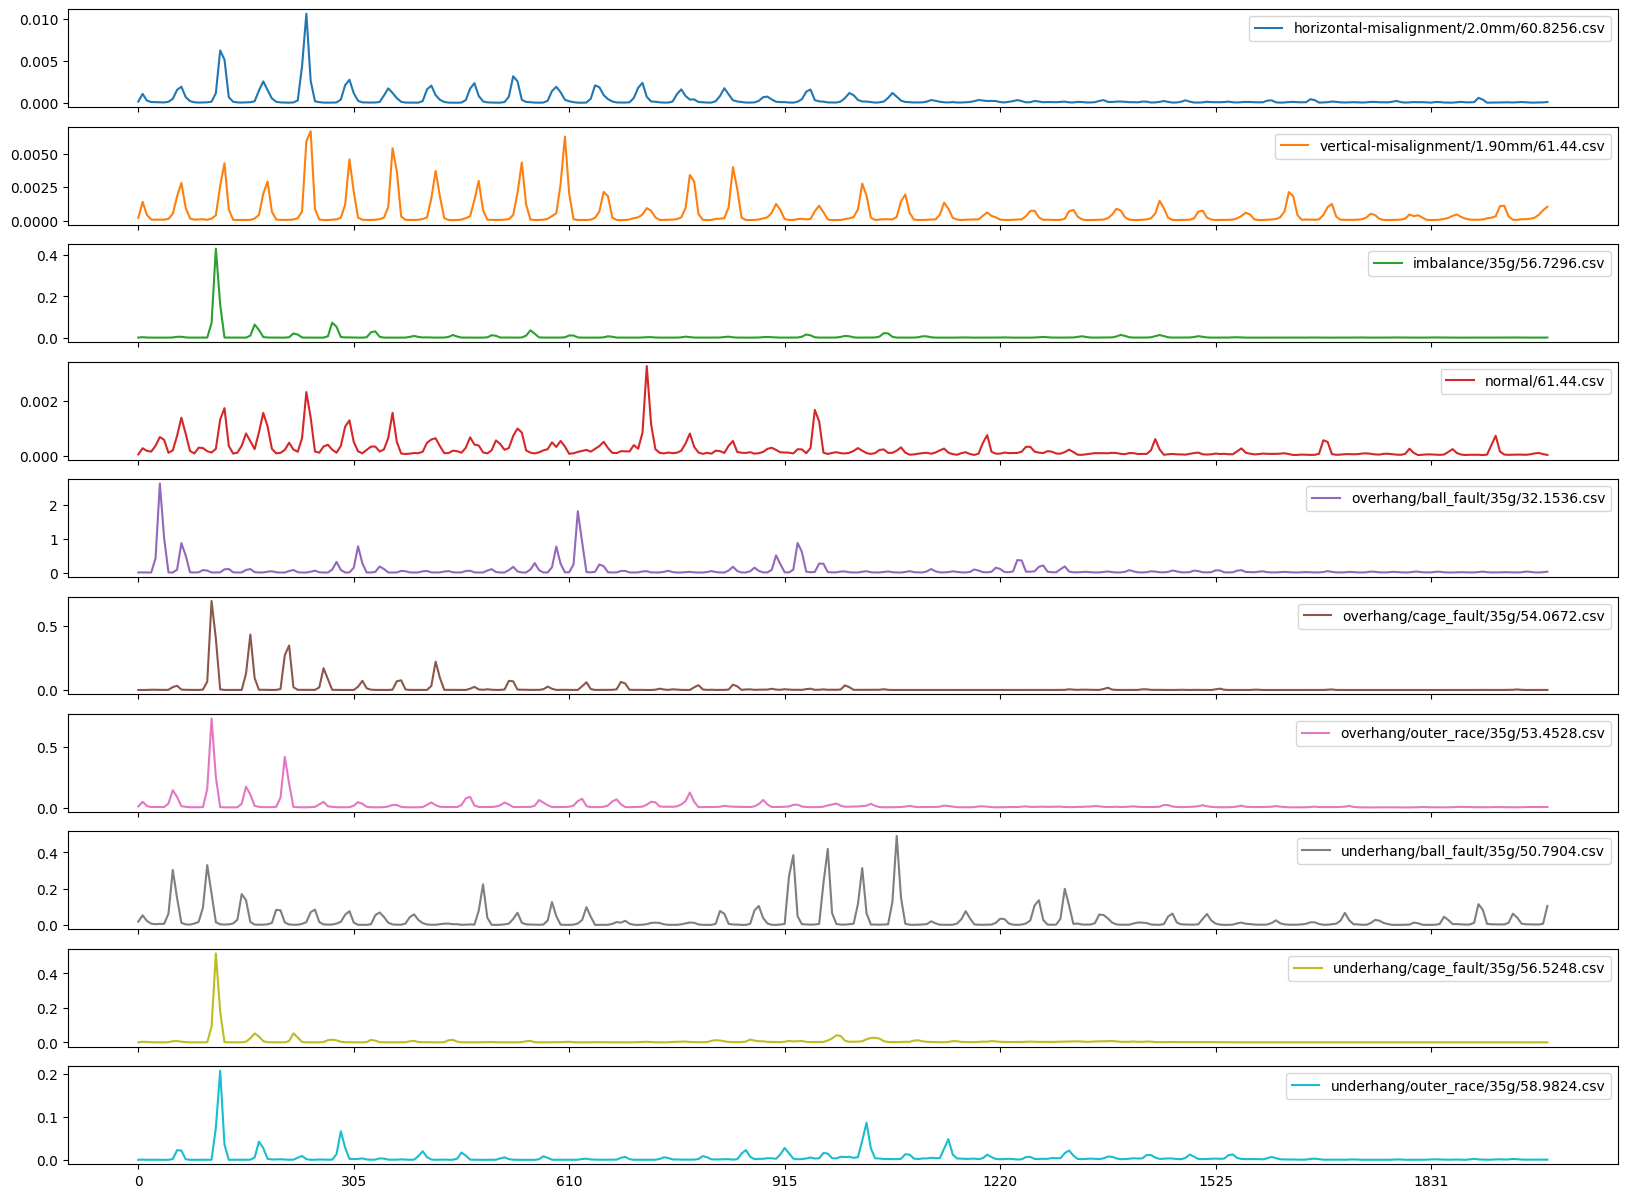

In [35]:
faultPSD_Y_v = faultPSD_Y.drop('rpm', axis=1)
y_psd = faultPSD_Y_v.T[faultPSD_Y_v.T.index < f_cutoff]
p = y_psd.plot(subplots=True, figsize=(20, 15))

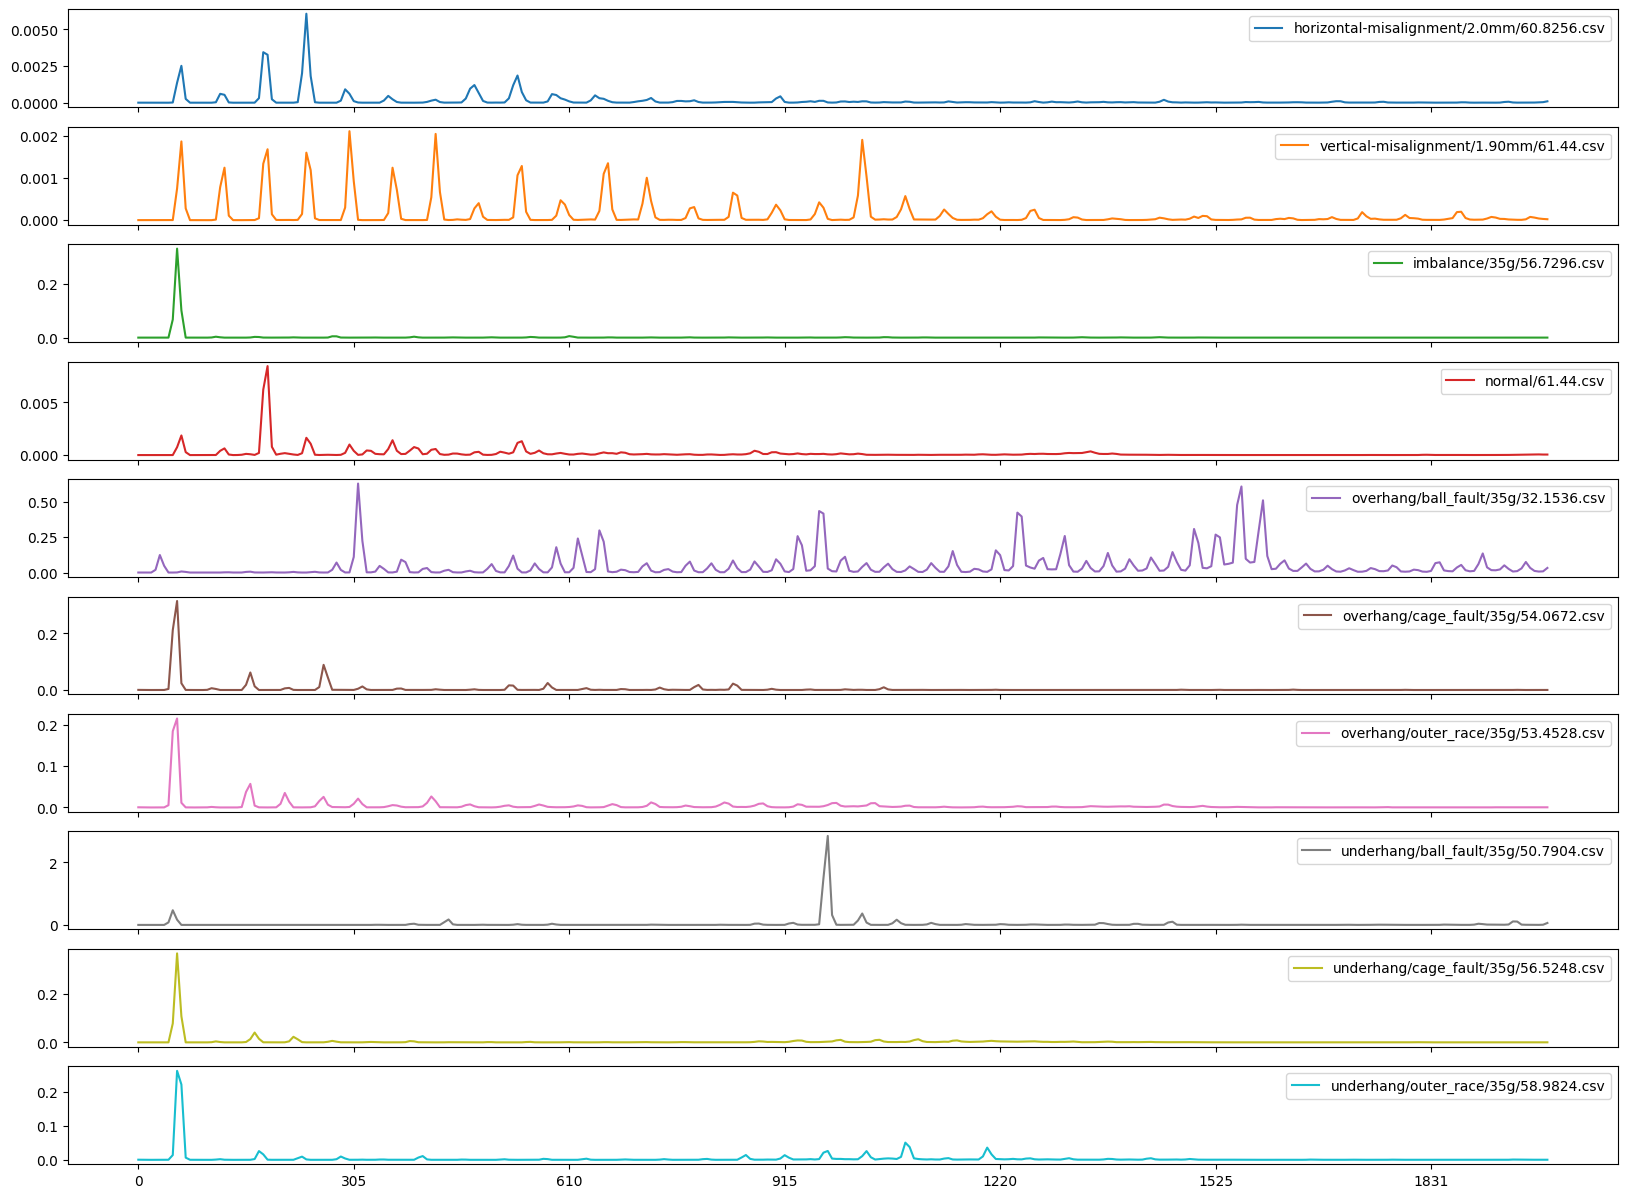

In [36]:
faultPSD_Z_v = faultPSD_Z.drop('rpm', axis=1)
z_psd = faultPSD_Z_v.T[faultPSD_Z_v.T.index < f_cutoff]
p = z_psd.plot(subplots=True, figsize=(20, 15))